In [1]:

import torch
import numpy as np
import seaborn as sns
from torch import nn

torch.manual_seed(42)



In [2]:
X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

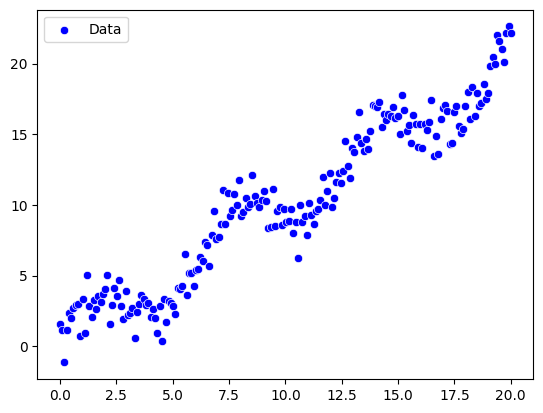

In [3]:

sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [4]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [5]:
df = Simple1DRegressionDataset(X,y)

In [6]:
df[0]

(tensor([0.]), tensor([1.5913]))

In [7]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [8]:
data_point = next(iter(training_loader))
data_point

[tensor([[8.8442]]), tensor([[9.8756]])]

In [9]:
in_features = 1
out_features = 1

# model_2 = nn.Linear(in_features,out_features)

model_2 = nn.Sequential(
    nn.Linear(1, 256),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.ReLU(),
    nn.Linear(256, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
    )


In [10]:

loss_fn = nn.MSELoss()

In [11]:

optimizer = torch.optim.Adam(params=model_2.parameters(),lr=0.07)

In [12]:
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=optimizer):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
            print(running_loss)




<ipython-input-12-fb2bbb37a4db>:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [13]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [14]:

train_simple_network(model_2,
                loss_fn,
                training_loader,
                device=device,
                epochs=40
                )



Epochs:   0%|          | 0/40 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

92.24359893798828
117.22672653198242
198.40834426879883
205.49200773239136
291.0941882133484
482.40755796432495
505.6681590080261
510.233434677124
546.6951351165771
608.1680660247803
625.6599750518799
651.655481338501
715.9341220855713
724.8496417999268
928.0033130645752
1214.3474292755127
1281.913766860962
1286.9481749534607
1329.3057188987732
1436.2242217063904
1439.0649588108063
1439.2271131426096
1445.7646945863962
1448.6886018663645
1584.978015318513
1622.7045244127512
1629.642153158784
1639.6157735735178
1699.351830855012
1763.5818036943674
1788.1882108598948
1904.5464033037424
1980.4813932329416
2131.093011274934
2134.3194152265787
2149.16373552382
2156.686058178544
2168.47068323195
2169.9649093300104
2228.3550193458796
2229.187527731061
2302.7603350430727
2303.5714166909456
2319.305460765958
2386.177431896329
2477.2572277337313
2562.316637828946
2855.584215953946
2870.2880419045687
3010.7748125344515
3186.088167026639
3459.0761125832796
3471.7429502755404
3481.321966961026
3485

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

24.596128463745117
269.4485607147217
474.5120372772217
650.3462505340576
702.4130344390869
895.8024997711182
1060.6110935211182
1222.5431308746338
1222.543437539338
1222.7835824179638
1223.3512800025928
1381.164573459624
1394.591674594878
1394.6499964508403
1418.1801230224955
1426.1106569084513
1647.4190980705607
1648.264607003628
1651.2514482054103
2039.5962663206446
2243.9073014768946
2380.274107507168
2380.7104960295546
2538.5098429533828
2660.1346827360976
2704.8700457426894
3064.0025835844863
3105.466157040297
3299.978699764906
3363.1881800505507
3538.7190943571914
3540.852914890944
3585.2751713606704
3595.0991469237197
3770.6535597655165
3820.2716933104384
3841.7946329924453
3877.500424465834
3952.5575762602675
3952.7362218561757
4166.440155571996
4274.56630761057
4568.240105217992
4617.044888085424
4644.1914621058095
4784.718363350927
4824.095038003026
4831.377064770757
4833.325848526059
4863.245102829038
4966.8568124237645
4973.6394519272435
4974.63832069069
5302.810806042253
5

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

12.829339027404785
120.44958591461182
196.30889987945557
206.48472499847412
324.03995418548584
344.8520174026489
365.40203952789307
505.30337619781494
513.3115825653076
547.0987300872803
549.0691890716553
554.739809513092
819.8663659095764
1033.4633049964905
1048.3779587745667
1201.8518357276917
1323.7837891578674
1347.143970966339
1453.0568432807922
1457.972228527069
1477.3156123161316
1590.55326795578
1600.5589127540588
1602.1483680009842
1610.4857379198074
1613.3745993375778
1619.1451810598373
1625.8979395627975
1652.1785773038864
1931.730945467949
1935.0860732793808
1954.8730682134628
1965.5199836492538
1973.464700102806
1979.0157727003098
2004.815129160881
2026.1537293195724
2303.05448615551
2322.8338364362717
2323.0081745535135
2408.511226311326
2408.5292956661433
2522.891913158819
2531.512702686712
2535.3022918533534
2634.454071028158
2642.275279028341
2769.166316015646
2794.873761160299
2914.220784170553
2922.410469038412
3052.1642837356776
3174.7555923294276
3377.5656204055995

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.164616107940674
25.849791049957275
46.652267932891846
47.97953772544861
83.09416174888611
88.47063660621643
120.36499047279358
123.22772669792175
124.34035801887512
127.7195496559143
162.12540292739868
209.5969681739807
217.46259832382202
218.63098061084747
223.94881784915924
231.15600168704987
272.69834864139557
273.71001732349396
273.71742357313633
282.77257074415684
299.47140039503574
317.7759105116129
317.86335242539644
320.1676203086972
320.2450936511159
351.5500710681081
351.8737596347928
389.683131583035
413.8803228214383
455.17465341836214
479.9327596500516
504.4423574283719
517.9323953464627
595.9289544895291
615.5394204929471
625.316260702908
628.234414704144
664.6802994087338
665.1354690268636
668.0625346377492
703.0197451785207
706.5290752127767
711.5674467757344
717.1269894316792
745.1476574614644
873.3140240386128
947.9225521758199
978.8179722502828
1368.8297825530171
1448.3118534758687
1453.1481586173177
1507.8837657645345
1609.4032588675618
1611.4824534133077
1706.289

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

18.813522338867188
148.21694946289062
148.29368557035923
164.0084921270609
208.63376297056675
230.1717478185892
265.0935465246439
299.402659073472
313.98495258390903
313.9853523733618
313.9921326028707
321.62349551790976
340.5541805612447
356.49773448580527
369.78365844363
382.4957708703878
400.6657003747823
414.8490938531759
427.8871759759786
461.80286735171103
505.51378196352744
531.5326628076436
572.7532514917257
608.442780910671
610.2396901237371
611.3275813447835
654.4617671357992
662.9389685975912
710.1081961976888
720.3562716829183
720.4695399912598
730.8360561045411
778.5822299631836
815.558021894336
818.5471004160645
898.3010677012207
898.3714906560781
954.2405626165273
977.9109289037588
982.395847021282
994.1687189924123
994.5847064542177
994.8230496036413
1005.5910463916662
1007.6241813289525
1012.1868186580541
1031.3026519405248
1092.7888312923315
1124.0833736049535
1135.1438775646093
1135.1441562247055
1135.1571522975864
1137.3227406764927
1159.7748814845982
1163.022200706

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

16.796579360961914
66.43084907531738
92.3702449798584
106.15689277648926
159.50048637390137
192.79689598083496
277.1322765350342
309.435884475708
309.49294911697507
362.1676851399243
391.26950703933835
391.2962429765612
523.5689938310534
539.5957768205553
585.2769406083971
776.4454586748034
784.0651605371386
784.223476300016
821.9218405578285
880.090347180143
928.6577032897621
1018.0994604919106
1048.602102169767
1049.0396692547947
1053.037983397022
1062.336639860645
1062.6832943651825
1120.4743252489716
1160.490514824167
1201.5945568773896
1227.2505455706269
1303.5337868425995
1313.3248434755951
1313.7458355221897
1360.5197994504124
1392.8394100461155
1452.890012005344
1499.9463245663792
1667.115941265598
1667.5516266617924
1740.5656037125736
1741.6391472611576
1803.7383827958256
1814.6140818390995
1832.2310805115849
1833.8111462388188
1879.9333538804203
1924.3061909470707
1950.6843800339848
2013.022934416309
2013.1315613705665
2070.964981170371
2097.699543090537
2144.9628334958106
22

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.449314117431641
17.09908103942871
25.6946382522583
37.699466705322266
120.28631210327148
155.49205780029297
160.76509475708008
179.1774196624756
183.91461896896362
225.14715909957886
229.34412908554077
236.05938482284546
253.22530126571655
279.8321738243103
290.81449842453003
297.89800453186035
330.3796100616455
330.4870583936572
334.1383278295398
337.4175026342273
347.02540897578
355.8158943578601
387.1788093969226
387.1816014871001
402.4040755853057
436.666603051126
485.8693275079131
518.8456534966826
529.5637063607574
553.739468537271
554.3890395984054
574.2850890979171
598.7272754535079
598.8088224902749
626.5624807849526
683.742202617228
710.7371405139565
711.1862604394555
736.582601763308
749.5189258828759
751.5781986489892
783.5908062234521
783.6361253932118
816.7204912379384
820.1173914149404
829.7513321116567
893.5304535105824
894.9168446734548
972.731343574822
990.1073697283864
1029.8928998187184
1062.9061864092946
1081.4262097552419
1167.0001080706716
1238.5758221819997
12

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

61.87193298339844
107.02138900756836
109.28374552726746
147.41028666496277
202.16174387931824
226.95172953605652
227.1130319237709
237.44972378015518
247.42185074090958
251.78234058618546
269.60657078027725
273.9853854775429
322.9854388833046
322.9891523087863
338.9821494782809
363.3227122987155
392.9329017365817
408.23427235730924
410.8263744080905
498.93569600232877
508.2898629868869
510.52209126600064
515.0071834290866
550.0189632142428
550.3357804978732
558.8223117555026
571.138544436777
588.9052451814059
606.1809905732516
613.2882283891086
654.8474706376437
655.9580407107715
732.3041024173144
771.0399155581836
773.8530285323504
780.0351502860431
823.2946221793536
851.3307702506427
863.1526715720538
899.962173220003
900.0919474328402
970.4920252526645
981.1241463387851
1001.8605202401523
1002.07436263212
1034.642748710001
1066.4422367776278
1070.6947821343783
1089.9758032525424
1089.984493353637
1090.6666239884216
1150.1554812577087
1187.4188059952576
1189.4164992955048
1308.354609

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

37.55889892578125
50.63680171966553
54.0164475440979
249.91132974624634
249.9474821537733
250.9419851154089
251.49792544543743
262.5829951018095
269.90877263247967
466.74577824771404
528.3835574835539
566.6459628790617
587.9536849707365
603.1601859778166
603.1923653632402
622.6073376685381
805.1703259497881
811.560429289937
838.2176596671343
897.2096869498491
968.4320609122515
1015.3501631766558
1047.765263274312
1113.9820220023394
1120.7912728339434
1131.8371827155352
1136.4368226081133
1145.3060175925493
1174.036472991109
1208.8788840323687
1254.9666678458452
1256.6150407344103
1268.0210170298815
1271.1266595870256
1319.1453897505999
1321.3813106566668
1341.0289871245623
1344.6010992079973
1412.571497157216
1483.5666830092669
1485.5651069432497
1519.7163825780153
1551.061168268323
1563.324219301343
1597.0145536214113
1620.5953164845705
1620.7408465445042
1621.0026040673256
1688.234514772892
1834.8260980248451
1884.7257791161537
1938.3944802880287
1938.4133898951113
1938.521043393761


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

23.744140625
30.273332118988037
83.43018102645874
100.79963636398315
149.4104151725769
198.153724193573
214.92187643051147
235.0509753227234
283.7863345146179
379.0115694999695
418.5527949333191
435.78040647506714
496.7437090873718
530.4645495414734
534.7455720901489
535.2775111198425
584.9452319145203
678.1418948173523
702.8201041221619
702.8213552176021
825.4460347830318
847.5707620321773
947.547606819775
995.0740159689449
1133.3136857687496
1262.4548753439449
1282.755925530102
1363.3383840261959
1363.390440968331
1374.2323351181112
1399.3804121292196
1431.4923849380575
1444.9816208160482
1472.8256969726644
1489.3474998748861
1504.0123310363851
1506.6208818233572
1508.3012655056082
1528.0876233852468
1572.2305677211843
1572.5037215328775
1602.46508818632
1645.1038783169352
1705.760715780314
1705.7658546329476
1737.2891300083138
1788.0692699314095
1846.9262035251595
1846.9267511887592
1887.313668303017
1915.7493105454487
1949.3852625412983
1949.678699754004
1951.320147417311
1951.9149

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.7569147348403931
22.581369996070862
24.28515875339508
50.36960279941559
55.80032026767731
67.9008823633194
74.86193144321442
88.03581011295319
104.14548647403717
110.95143806934357
111.9856014251709
114.36775350570679
130.73246335983276
130.8356635197997
132.17458077520132
137.03992863744497
137.07390231266618
138.37922805920243
141.65829581394792
142.1901148594916
156.51712596789002
182.30502117052674
187.5015891827643
209.12352216616273
230.93642270937562
235.19705856218934
250.4854038991034
298.9038952626288
307.5309523381293
307.54723445139825
310.183159744367
316.52116385661066
319.18245736323297
328.9900774117559
334.71911517344415
339.2932547684759
339.5388539042324
339.703626325354
340.0915398504585
341.66397618316114
343.323333254084
346.8894710447639
347.74783544801176
349.0531033780426
367.5342721249908
372.4882702138275
388.4135593678802
405.1492981221527
412.3596009518951
431.7718076016754
434.28826682828367
439.8780066277832
441.4719460513443
446.98100452683866
452.4958

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

32.99065017700195
44.73422813415527
52.74002933502197
62.18025779724121
83.14959144592285
96.63767528533936
113.17099285125732
117.55806112289429
117.58012795262039
120.13824653439224
121.7271187286824
127.40066218189895
127.49161696247756
127.49957173503935
143.4999226871878
152.408545428887
156.23212283290923
182.61456339992583
184.0917854849249
187.74858599342406
190.57522802986205
200.68491869606078
211.35811548866332
211.67329877056181
221.62928097881377
223.28733795322478
242.02985351718962
242.97282039560378
245.36676585115492
245.97423314489424
249.02263688482344
256.9747071210295
266.3439984265715
282.2850623074919
285.66891002096236
286.5163545552641
287.38580566085875
288.20698409713805
288.8063685838133
288.880901100114
290.16950762458146
296.1480709332973
296.29138452000916
302.4470294136554
324.9230006355792
328.34925037808716
328.4262932408601
329.8148282635957
370.0393727887422
385.61676250584424
386.33758615143597
390.1896421778947
395.4721572268754
399.31708525307477


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.0807662233710289
0.37036480754613876
0.3749337955377996
10.957496242132038
10.969040208961815
12.988853746559471
55.191791826393455
57.03129654517397
58.18211179366335
66.57850270858034
66.57967193773948
66.61235418519937
76.61539163789712
77.49279829463921
84.84143253765069
86.78240927658044
99.84424551925622
108.68353327712975
109.69396301708184
112.25220986804925
114.52140804729424
116.42696925601922
117.37679364881478
132.92774942121468
141.61320188245736
141.61352469504345
143.94032527983654
147.90469171584118
150.8059275347041
155.47130848944653
166.0922954279231
168.19908668578137
168.26889466971625
173.17528915137518
181.97167300910223
192.31508731574286
193.80973076552618
196.14428710669745
197.6554223272251
203.83293497294653
203.88401218981016
203.9242237258004
205.29870182753075
205.88949835777748
226.43806326866616
227.5232620286988
235.65096760273445
239.2477037954377
242.3092558431672
242.31340783613268
249.62756389158312
253.34684413450304
296.614407000714
298.4680756

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.13289208710193634
0.8285051137208939
3.708409622311592
13.212347343564034
18.819983795285225
23.98272307217121
42.779079273343086
43.124259158968925
61.71597783267498
73.89804665744305
81.65445153415203
82.47077684104443
83.92800287902355
83.92935746326111
84.56829124107026
89.27489476813935
96.05554729118012
100.47512727393769
102.08601909293793
102.93122904910706
103.01889163418673
104.01625359221362
104.46175956889056
104.63764211698435
120.67662832303904
122.92392823263071
127.18006512685679
127.38515928550623
135.3851983861532
136.1557814197149
139.480859430274
142.93310061260127
143.82191994949244
150.3610673265066
153.43090155883692
154.22102448507212
154.44433827861212
158.3733403251972
158.8690899477806
181.26954732998274
186.29847894771956
188.9288052187767
192.7361689673271
201.95095931156538
202.1002939210739
212.0325210557785
222.42713050707243
227.56753616197966
231.24778656824492
233.96936325891875
234.1159042881336
242.6381563709583
243.4446062014904
263.4392026828136

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.35225772857666
6.553293362259865
6.797593683004379
11.2864428460598
17.446688264608383
21.482825845479965
21.993649870157242
28.71388903260231
29.133727222681046
29.190227825194597
31.781362611800432
33.11565800383687
44.4342863149941
78.73623867705464
100.28358097746968
100.76191126182675
101.3922013528645
102.79883663728833
103.17871623113751
104.29231541231275
121.92534153535962
122.4422159679234
122.5463521964848
123.13684820011258
124.20515118911862
128.25003062561154
129.0079783089459
132.73635398223996
136.85413371399045
140.8281332142651
141.0233454145491
152.37991661205888
152.6623500622809
167.68451631441712
167.80936321988702
174.1328919865191
174.91549799218774
175.02913812175393
179.07596257701516
179.2088139988482
180.06736001744866
190.39236745610833
197.23323735967278
198.43715307489038
198.54774356260896
221.11228251829743
235.95863128080964
236.71885764971375
237.4339278973639
237.71987525001168
254.06817046180367
257.5711397267878
275.7960638143122
280.995371732860

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.25507858395576477
0.8859215080738068
3.723679333925247
4.817334085702896
4.9222109988331795
10.184008903801441
10.502810038626194
10.521278075873852
17.14961116760969
23.52421348541975
29.067478828132153
38.85829704254866
39.62074106186628
44.97612779587507
45.298841796815395
47.13130398839712
56.48076459020376
58.19869514554739
60.70933028310537
61.87480851262808
62.297783605754375
64.69981407374144
67.92720317095518
68.00901186466217
69.5056940317154
74.46389019489288
74.78191748261452
77.6079823076725
78.2230711877346
79.59745427966118
82.51501199603081
84.13912865519524
114.64358231425285
114.87218409776688
120.74715453386307
121.17688128352165
125.67098566889763
126.54578223824501
129.85936751961708
132.42847099900246
133.37320426106453
134.80366161465645
138.52847078442574
140.00247541069984
140.00249459081533
147.0530526810253
154.22813631826284
174.84614397817495
174.8956594974661
175.64655946799758
178.22201370307448
178.2456701998526
178.7465651635939
185.04330617235246
187

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.5179247856140137
9.120583057403564
38.165367603302
38.61613157391548
48.49096563458443
48.49978836905211
49.853258336894214
56.50148412119597
68.75894853007048
69.15181877743453
69.32657405268401
88.4304673327133
89.17259993683547
89.19818165618926
90.2362318309024
95.30296852905303
98.15555789787322
102.45603444892913
104.35656216461211
106.22817411739379
106.28659493569285
111.34768111351877
118.87850720528513
122.79511458519846
133.02168376091868
134.79055566433817
135.48640657309443
135.58903049770743
138.27661680523306
140.29107713047415
157.3532490665093
166.28127812687308
169.06974529568106
178.48890613857657
179.0557546550408
185.03507947269827
186.29468201939017
192.98587130848318
197.45467328373343
197.53302921447903
198.6992848077789
212.00787569675595
215.15239812526852
215.4053478995338
218.6811939040199
229.6542926589027
229.75026834849268
229.76726323086768
233.6207569213584
233.67232630122453
235.0198094593361
235.54114887584
236.2057261215523
236.77459839452058
236.8

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.007924795150757
9.59500241279602
11.916544198989868
12.923404216766357
13.023715175688267
22.08789364248514
23.399620808660984
24.293968714773655
24.66002432256937
24.703812070190907
25.042904444038868
25.552923448383808
31.097257383167744
33.828256852924824
35.10877848416567
81.98985148221254
82.20768492668867
103.48498099297285
104.99698906391859
105.6932632252574
106.09518998116255
111.11134093254805
123.0199074074626
124.12591331452131
124.49601527303457
124.51328201405704
131.01832695119083
146.33179302327335
146.75358615629375
147.67508737556636
151.9598678778857
155.94024626724422
184.43195883743465
184.7804389130324
185.0691426228732
266.41527299396694
268.57859138958156
270.23373488895595
338.68509749881923
346.39678649418056
376.42283324711025
408.387823862955
411.7653394173831
424.3081698846072
425.06273381225765
435.5724851321429
438.68290249817073
440.6935135554522
441.0405241381377
441.045278955251
441.92393355444074
446.7238731868565
446.99645932391286
447.278611917048

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.6244690418243408
2.144158363342285
26.300009727478027
38.29739475250244
38.585658967494965
41.269682586193085
41.84331792593002
42.442902863025665
43.44560545682907
48.58382719755173
48.767038732767105
59.284075170755386
62.60662165284157
68.34661474823952
68.38572211191058
74.64525790140033
74.7132856734097
75.75848578289151
75.77974672429264
80.774045182392
82.57104129903018
105.79127712361515
121.42928905598819
124.20347685925663
126.73242969624698
129.24022455327213
131.24897809140384
131.28332173265517
142.08106648363173
150.62917935289443
150.6367940781638
153.08039139490575
176.5802788613364
178.39569543581456
186.1479413388297
200.81326173525304
210.19608186464757
210.66916404943913
218.18949400167912
278.4114063857123
281.4608508227393
283.6498268721625
307.9336517928168
309.2486952422187
311.8471785662696
313.8946386454627
314.54076831322163
320.91808192711323
321.01711869519204
321.2054889826104
321.7441987423226
326.07325309794396
327.6956334738061
327.7227283259854
337.1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.18789522349834442
0.24379106611013412
5.159894905984402
7.263836823403835
30.095015488564968
38.90652462095022
53.02351566404104
53.39985357969999
56.18809138983488
59.47917925566435
70.92595469206572
87.13657366484404
87.17803747206926
88.57579655200243
89.71469552069902
93.61005742102861
126.50092274695635
126.51799000054598
126.65909533947706
148.03959422558546
150.72506170719862
153.4574575945735
154.66636817902327
165.14263217896223
166.8254595324397
172.64549546688795
173.73673348873854
174.9973723217845
175.0106301913038
175.02469793520868
175.03374596778303
176.76569982711226
177.69158955756575
181.36918398085982
188.9761829013005
189.81030245963484
205.86815425101668
210.17728587333113
210.44162692967802
210.9656133884564
211.03292544279248
211.891812578775
212.02069543395191
220.54346536193043
220.70017933938652
221.1048547932878
228.04709598515183
239.48542663548142
239.58474978152663
240.18818011227995
240.4326524073258
240.73166417423636
249.52866792026907
259.4185080463

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

20.45774269104004
20.934919267892838
27.276103407144547
31.68582859635353
31.7678449973464
32.31591334193945
41.063207767903805
46.433974884450436
47.15482868999243
49.19033183902502
53.268537901341915
53.36567152291536
55.606045849621296
65.35778153687716
65.41114735975862
66.03289741650224
74.45667976513505
76.64400262013078
80.28781551495194
99.1015686430037
103.90661424770951
105.6830841936171
105.74324098974466
112.23647514730692
112.28725665062666
115.83855288475752
115.85002728085965
119.5900957165286
121.6105064926669
121.77058707457036
130.88902579527348
132.00227283220738
134.66921542864293
147.36308120470494
147.3860325841233
147.62217487674206
147.64685677271336
149.18524156790227
150.142308938317
150.54612519126385
151.84748567920178
154.83216347079724
156.8866039691493
156.9253070903942
160.65674525033683
173.98442583810538
176.05635219346732
177.60444157849997
204.96752255689353
215.30531495343894
233.00987237226218
241.50149911176413
241.81301596295089
242.0135388178751

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.06172872707247734
13.52487589046359
54.32481027767062
95.60731149837375
95.698893930763
155.3620142005384
163.18550005182624
169.01524009928107
219.4425815604627
219.45232109446079
222.47147659678012
228.00079349894077
239.89193062204868
240.00463602412492
240.24600385595113
242.03727220464498
246.91182540822774
253.0066721336916
253.247331132181
253.25187122216448
253.2611381416209
258.5081865196116
258.93338808463886
269.5728066866286
269.9542216663249
271.7865208988078
274.26159375952557
276.07739228056744
276.1901181717403
280.8160208244808
286.0007246513851
286.0083465767093
288.9553976249881
312.4908914756961
313.223552305717
313.23743819026276
321.3674220922403
323.528346050065
331.5412778737955
332.4678541305475
340.11650000838563
353.2073699119501
357.02232061652467
361.5810717227869
362.34608434466645
362.34916205797344
362.6068898299709
364.53017757926136
366.68547152075917
366.8160364339128
366.84692777041346
373.76287043932825
395.11895526293665
395.17095825541764
395.22

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.39527428150177
1.4722694978117943
1.5415210500359535
1.9023276343941689
2.7867688313126564
6.372188247740269
6.699408836662769
8.96365625411272
14.892804451286793
35.125092811882496
35.5584911480546
37.78441754728556
39.482583083212376
59.36828903108835
68.58090785890818
68.70764925330877
68.82071416079998
68.84819814004004
68.91291471756995
69.02736466564238
74.27175276912749
77.94905822910368
84.07592695392668
84.68019693531096
87.23721450008452
87.66123410500586
102.87635632790625
103.16995527781546
103.61553510464728
105.15046306885779
105.15050799772507
107.74500567838913
109.1144147627092
125.37311227247483
127.7634421102739
136.32034594938523
136.42757181451088
142.5174918584562
142.77299110219246
142.77301168427402
144.36113142952854
145.36849963650639
158.36227977261478
158.74526423201496
161.29069727644855
164.5444659589284
166.30931335673267
188.7576852439397
188.75990339074815
190.1294848517009
190.1423865108245
198.64918811604912
201.22927243993217
206.9603901653045
207.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

18.300172805786133
18.471056148409843
26.074771091341972
26.781780168414116
46.06466095149517
47.164165303111076
57.61605243384838
62.0843298882246
76.7402251213789
79.98214177787304
79.9850464486517
90.87458807462826
94.77031141752377
95.7306993030943
96.94061303371564
100.13443422550336
112.60213995212689
112.83838607603684
144.59410812193528
146.7338795834221
146.7446522046812
151.03259366052225
151.07124764146283
186.92379433335736
192.0763760250993
192.131311242003
192.26653056265786
194.85848050238565
195.0988102448173
219.02053074957803
220.46935801627114
224.5953579437919
229.75292830588296
229.86408593924716
229.97789474995807
236.2966074612923
245.15380426915362
297.0805887845345
304.44113012822345
305.1861568358727
305.8495730427094
305.98191536637023
306.0350008835085
306.54649891750887
306.95063310163096
307.3444666196592
307.96014647977427
308.00154933007434
310.1709652808495
311.0032393601723
311.0480604735203
311.5624285307713
312.22646301658824
317.6690503922291
318.80

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

9.6915283203125
9.98287495970726
12.151664346456528
12.173176255077124
12.218139216303825
21.602448984980583
30.40501742064953
35.340801760554314
45.54704527556896
48.84747962653637
48.912098713219166
52.786194153130054
53.155207611620426
53.42874635010958
57.12325728684664
57.67642182856798
58.47688592225313
71.69667924195528
79.25944150239229
88.83362782746553
89.07718018442392
92.64448145776987
104.66399554163218
116.15512160211802
117.83944372087717
123.81235698610544
124.41950229555368
125.48189536482096
126.0073231831193
126.7242865934968
129.3801999464631
138.4456181898713
138.9756859317422
139.89483676105738
141.39703557640314
142.1704382672906
142.35192208737135
146.41083054989576
158.010407499969
159.1174426600337
171.21887355297804
171.27472160756588
172.03775070607662
174.2839929908514
178.36684964597225
181.48083375394344
181.91947455704212
182.71325643360615
189.29557140171528
190.05956675112247
191.8091133981943
193.34870959818363
193.35643918067217
193.4217465221882
193

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.013500770553946495
11.000882705673575
11.002036852762103
16.262839598581195
39.805680556222796
40.599919183179736
43.701227052137256
43.84861041419208
43.855589180253446
44.362227528356016
54.70513543393463
54.79579076822847
54.864268503151834
55.15499185677618
55.38793163653463
55.76360934134573
62.97738259192556
83.50163262244314
85.70495932456106
91.29835026618093
91.37670686747879
92.19247308280319
94.6824654629454
95.89613023307174
96.54510649945587
101.2691303184256
101.30296632181853
105.99508162867278
112.52252360712737
112.9607274485752
114.07223033439368
119.87524079810828
123.54347013961524
124.99260222446173
127.06205570232123
127.13679769169539
127.16000078897923
127.29011328797787
127.29020075175504
127.76607121202687
128.8727271673415
129.30550919148664
132.63701472851972
133.00803421113233
135.7677545366023
137.12346659276227
141.65620766255597
141.69534293982724
141.71065599239955
141.71594132065366
142.48191184877942
147.64353341936658
147.71308394103835
151.6147276

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

10.881474494934082
11.272351056337357
12.194788128137589
12.2473887167871
12.72167107090354
13.064138855785131
13.609988298267126
13.618018310517073
13.627424559555948
13.656069318763912
16.310045043937862
17.592002908699214
18.574392358772457
19.75172762107104
20.259920279495418
26.324144045822322
34.7553068799898
36.54139558505267
37.81188539694995
57.064759771339595
57.40354124736041
113.91597334574908
125.6943003339693
132.1334406537935
203.2249933881685
213.8487774534151
225.9489275617525
226.81965253781527
227.10498518776149
235.98277373146266
236.420127610676
238.69214628171176
245.46274278592318
245.99971554707736
250.5698153777048
251.6301215691492
252.91176138352603
255.7399972481653
265.20840583276004
265.5212761266157
266.6858289344236
267.09569553565234
267.2357565863058
269.91104717087
271.84800691436976
295.29902047943324
299.21534867119044
314.30927986931056
328.5598692400381
328.75251782964915
329.2286600274965
344.2949184579775
344.34095917176455
345.26578287314624
34

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.06658732146024704
6.208260886371136
13.362923972308636
19.164695136249065
19.366614304482937
26.062962971627712
26.632963679730892
26.978261820971966
105.57059275358915
194.8777598068118
194.9783355370164
206.04884258657694
240.31930843740702
249.2992583885789
249.4701608493924
252.64413035660982
262.19652808457613
304.67803824692965
335.4619127586484
339.6617404296994
348.0858517959714
349.0432508662343
367.206561870873
378.9792116358876
392.5469816401601
393.8893678858876
395.993632145226
405.4518545344472
416.6829212382436
431.2285068705678
435.7382324412465
435.81756000965834
457.3233583495021
457.32939903298393
457.48494936386123
465.98778749862686
486.1268408433534
500.77057768264785
516.552120460663
516.5724302218296
524.0782314226963
544.3375717089511
545.792898862157
546.4012121842243
551.6477255509235
551.7030109153129
553.9009417281486
556.4852129206993
556.556659987662
559.8546648533083
561.7352926046588
562.0345315248705
562.3622058839537
568.2023605317809
568.2169342315

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.7029436826705933
5.389197468757629
7.382660508155823
7.487599045038223
13.471117168664932
14.590744763612747
14.729546085000038
27.16129733622074
30.58792306482792
31.087141528725624
31.164407961070538
31.20459731668234
44.921398006379604
44.95719921961427
46.80624318495393
47.082678470760584
60.415404949337244
60.56382717564702
63.7660921998322
67.88795127347112
72.73594321683049
75.04991855099797
86.99924983456731
87.131760481745
87.80820042267442
92.07498795166612
92.2163542099297
92.8462279625237
102.6314252205193
102.92302622273564
125.48137773945928
137.10507406666875
142.2642952390015
145.84424151852727
149.17039098218083
152.64784326031804
154.40565194562078
163.90345754101872
169.29490031674504
169.4240856654942
170.36588184908032
172.04264526441693
172.45028515532613
172.46648249961436
172.47042797785252
173.41870270948857
173.57575702946633
176.7694623498246
178.6247361926362
178.92254168074578
181.95015079062432
186.88688022177666
186.91040898580104
191.51185752172023
191

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.5336131453514099
1.8910738825798035
2.651605486869812
16.861769556999207
18.090032815933228
20.71185302734375
22.73660922050476
26.965534448623657
27.94304782152176
28.546469271183014
36.76311641931534
39.146250545978546
41.10066455602646
42.67784255743027
43.62951374053955
48.40974807739258
49.15152949094772
51.4198254942894
58.2994150519371
59.07412075996399
65.86699175834656
66.96443235874176
67.16684871912003
72.55698066949844
72.56144333910197
72.58499668445438
73.05616576876491
73.20799836423248
73.87484457995743
101.67324736621231
170.02125456836075
224.48448851611465
231.4319396307692
239.86751702334732
241.79810967948288
243.85688438918442
245.63589242007583
274.6115699103102
274.80980263557285
281.65645848121494
287.2874895175919
293.7001052936539
297.0349601348862
300.0445903381333
300.7410463532433
302.6271579703316
303.6364242276177
308.4109374722466
308.4282990815118
309.2186267497018
309.8322430374101
312.4872411014512
312.4965358581394
313.96184786222875
316.279439052

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.1100094318389893
2.319711357355118
3.024132877588272
4.212551265954971
4.242740385234356
4.2727600652724504
26.591548593714833
27.154234560206532
32.64534250088036
38.87829747982323
41.9649643022567
61.12671128101647
61.61875322647393
69.5388100463897
70.07708904333413
70.07880260492675
70.0892808844801
70.36264656088315
70.38576112850569
77.31332574947737
77.84047870500945
78.364632593235
78.43474157317542
82.38808544143103
106.93668849929236
107.47426839335822
117.39553399547003
117.58709402545355
118.23085041507147
118.7776007221546
118.79569700895809
118.93752979277633
119.69036703347228
126.92707519768737
128.47667246102355
130.5609231495764
130.57147342595272
138.14924461278133
141.12877447041683
144.34153944882564
155.26716334256344
171.9381933871191
173.81431443127804
176.89196688565426
176.91679244930856
178.3651720851194
189.9646059840452
191.32591372425668
191.5320925086271
191.62225806410424
196.12890469725244
196.15248908172362
200.89896716247313
203.8339187062811
208.78

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.8518627285957336
2.799721658229828
4.939126193523407
4.944425432011485
5.9133735578507185
7.912204710766673
8.031228577718139
8.139040468260646
13.087870119139552
13.40383449010551
19.894393114373088
19.929132541641593
19.951882023364305
23.8215977139771
24.78165479376912
24.851647157222033
28.332735557109118
28.61261873319745
32.71784334257245
34.60781531408429
41.388159800320864
42.13194631412625
42.204146835953
59.5309061743319
60.73134038224816
61.104106936603785
61.73484078422189
61.7362525757635
63.64251425827388
65.28489676082972
77.7499894198263
82.13506069744471
92.94273224438075
120.75947990978602
130.94641056621913
130.9940285567427
141.2437834624434
141.6529055122519
143.06491963902954
143.75261216203216
143.9954675171757
143.9955300213769
146.05272449273616
146.66681749839336
146.68748579639941
146.93882272858173
155.3819188894704
158.20974753517658
158.33402056712657
158.74414454121143
162.4470611633733
165.7849367680028
168.79586539883167
169.23562930244952
169.4816815

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

21.99395751953125
22.51460564136505
22.68757151067257
22.829120710492134
26.25128348171711
27.534876063466072
28.379496052861214
28.46783024817705
28.472251317929476
32.06260576052591
32.336427859496325
32.395955230575055
35.58604350266978
40.601805354934186
43.2281240480952
43.66962661920115
57.39111175714061
70.30175724206492
70.76053383527324
71.59123393474147
80.11958381114528
80.45652710972354
80.67432227311656
82.94133010087535
83.59630730329081
83.6196526917629
85.81560534564778
87.57163423625752
88.26274907914922
88.37421041307971
88.58615605114028
88.59282865701243
88.6070624855347
90.70087566645816
92.12884071143344
92.60374918254092
93.25628587277606
94.12275877268985
94.12571185501292
110.99830287368968
111.01051293453202
112.22938393196091
112.50962291797623
112.51499184221029
113.4874004945159
115.16008623689413
129.31451090425253
131.63560803979635
131.638352062786
131.70794886746444
135.82331294217147
137.61023909249343
137.66507376753725
137.69048539199866
137.71203452

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.8232746124267578
5.002673149108887
6.225113868713379
6.248842587694526
7.81613134406507
7.8285645032301545
9.761795022524893
9.769149329513311
10.544306721538305
11.268027033656836
11.268613849475514
29.288063083484303
90.09648517210735
112.46266940672649
112.54144126613392
114.74009329517139
214.50389486987842
216.61002308566822
217.32827097614063
217.33730309520615
218.40744429145707
218.5864591083373
218.77020148251904
227.8994195840205
228.61063859675778
229.68707535479916
230.45874247764004
231.07780335162533
232.77777145121945
238.5063094875659
238.54411821131362
243.50005130533827
249.92068748240126
253.05266408686293
253.22280678217066
270.6354177898611
270.63981776934816
277.68054157000734
277.687829780567
280.68035082815913
283.5129347324255
287.44511895178584
287.49165373592405
289.743805702019
290.50214445142774
291.21411484031705
310.98862236290006
310.98926621163264
313.4951043673791
315.42244928563014
324.0380260297097
327.59608214581385
332.63078110897914
332.63115945

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.891606330871582
6.641295552253723
8.801677584648132
8.831169774755836
12.586820533499122
12.688225304707885
13.01606754027307
19.045564686879516
22.845078026875854
22.879961581900716
23.779986830428243
24.076438369229436
24.23206845112145
24.358514638617635
25.719786735251546
26.48331114836037
26.99465504474938
28.798715027049184
38.165045173838735
39.640843065455556
40.60151323862374
40.63339291699231
41.370322631672025
42.68645958788693
43.609816478565335
48.79122536070645
49.14390938170254
50.355650113895535
50.40674629993737
50.40865963650867
50.74013930512592
52.11719912244007
53.3804177637212
54.79039055062458
55.40116089535877
56.31288707209751
69.0108441109769
69.07937276316807
74.95396411372349
78.92477405024692
84.52095735026523
84.52470782864839
84.6394799919799
86.16102337557822
88.00798141676933
106.99245559889823
141.53493606764823
141.56300007272512
192.2220157282427
229.9914020197466
267.49898945260793
271.00177751947194
272.4703971045092
272.80673395562917
275.515906

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.181415557861328
13.930237770080566
14.570497512817383
17.949068546295166
27.24818468093872
27.25433357991278
31.205085838213563
31.30605331249535
32.938084276393056
41.78833738155663
41.8339977581054
41.88258804194629
41.942675622180104
43.04584506340325
43.05532043799758
46.2649092040956
49.783213313668966
50.09078785404563
67.55854984745383
116.95617100223899
123.35140081867576
123.51353849098086
123.51623169565573
123.5210367878899
123.56609084736556
124.0587952984497
145.3924363506958
161.3945115460083
166.3583010090515
166.37912204954773
166.80483618471771
168.10291102621704
168.20409922394902
172.0194936254993
173.63936953339726
178.52505497727543
179.43181233201176
179.66701017413288
182.32823930773884
183.18203781638294
183.1825533369556
187.62304453644902
188.24432693514973
189.35479043517262
195.37336610350758
201.04228423628956
201.41507814917713
202.93653808627278
203.9842649558559
215.61138878855854
216.07336519751698
217.42217932734638
218.0742708304897
220.099803314544

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.574463367462158
6.715010419487953
7.083159759640694
11.179205730557442
14.71759469807148
14.915564253926277
15.151931837201118
15.18192376382649
15.19342514500022
16.46825286373496
22.91138192638755
30.893390860408545
31.90298005566001
32.34744652733207
45.165881242603064
45.7030175589025
45.78770765289664
45.96145495399833
51.54155978187919
52.14370622858405
58.760752107948065
58.7643607466016
63.00194533751346
63.16802356229164
101.66148135648109
121.05641505704261
121.75751796946861
125.78228679881431
125.78359634475783
143.29968864517286
143.3149363878183
143.3793176296167
156.62823234824464
156.86744881002232
157.04963209060952
157.06090758973733
159.62787460023537
160.0068152123131
161.30103780562058
161.6778093748726
166.1931263380684
167.55420030886307
200.79647936159745
207.63644661242142
213.38036550814286
214.12465377384797
214.2682591401972
214.8567481362261
215.0937355631031
217.42230974370614
219.4376808279194
223.5171061628498
227.26265798741952
228.03023855620995
228.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.8390422463417053
0.9205860197544098
15.892296224832535
15.928450625389814
36.52931312844157
37.75722209736705
39.981270711869
39.98563691228628
40.34233533591032
41.986711733043194
42.66064213961363
42.6911664865911
45.08331307396293
46.29525753483176
49.88743373379111
50.03226177021861
50.70839820429683
54.46952162310481
55.975669126957655
60.83512852713466
61.54142991825938
74.04924718663096
74.20059559866786
74.46744714304805
74.48726017028093
75.50276548415422
76.22648907452822
81.08078671246767
84.11924815922976
84.7998091056943
84.85956932604313
88.75916363298893
89.15438447892666
97.04905067384243
97.54932962357998
101.82665906846523
104.05845557153225
104.32934822142124
105.61233367025852
121.10499133169651
128.9919794946909
132.69464649260044
143.7838131338358
154.45584453642368
163.57579196989536
164.2785256654024
164.3608820438385
164.72809487581253
184.83203583955765
188.1487219929695
188.21151416003704
189.93084494769573
189.93505304912105
192.71934145549312
192.74857748

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.5848692655563354
6.280538439750671
8.368759036064148
8.40311973541975
9.027858726680279
13.198724262416363
29.834651462733746
36.14017056673765
43.40541457384825
69.31423377245665
69.67893698066473
95.92538740485907
97.53534438461065
97.53687048703432
99.88740683346987
100.25011087208986
103.57065034657717
104.81669426709414
105.57567245513201
105.69195936620235
107.62165902554989
112.99807332456112
113.04166372865438
116.98681076616049
118.0624086484313
119.18062587827444
120.44024773687124
120.44241648539901
147.44484835490584
161.83655386790633
168.48977499827743
213.74425726756454
240.00626593455672
240.0752206556499
240.7074049822986
249.85521210357547
253.07637847587466
261.6192976348102
282.2816282622516
282.2934937197715
282.76778790540993
283.90812644548714
289.3853474576026
295.0254879910499
296.37488922663033
297.5828691441566
297.8059927839786
298.34000379033387
298.5089706648141
299.5493054855615
299.7044725883752
299.8818447012454
301.1752472538501
303.08752054162323
30

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.04628198221325874
3.069292951375246
3.1846778504550457
4.533827673643827
4.925657611340284
7.241759400814772
7.4839720241725445
16.359192322939634
27.851947259157896
27.896686036139727
27.925149017944932
27.92928566224873
30.197841780260205
31.43781461007893
31.460204482078552
44.60745370388031
72.97216737270355
83.51636350154877
99.41222035884857
107.043177485466
109.72230660915375
113.13492810726166
113.69017320871353
131.1450873017311
131.21177481859922
187.98190497606993
196.9631919786334
198.17758809775114
232.73117696493864
234.31824409216642
240.62424098700285
289.46964656561613
290.4058499261737
291.48857509344816
293.04621278494596
293.0496058971621
294.29612462827936
294.2962931949296
298.6100367862382
299.55678534094477
301.09725021902705
302.5349446493783
302.72751675132895
302.738078099268
308.4642357645207
311.01595209218794
311.6511701164418
315.96568999864394
318.42622790910536
320.0526910839253
323.32073650934035
327.6647606907063
330.9315131721669
331.27804891444976

<Axes: >

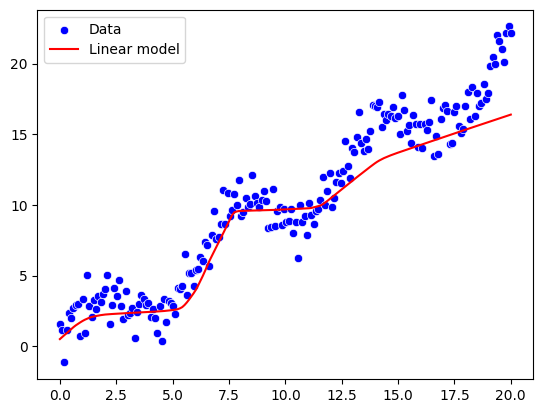

In [15]:
model_2.to('cpu')

model_2.eval()

with torch.inference_mode():
    y_pred_m2 = model_2(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()


sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')
